# Asynchronous Lecture 05

## Atrificial neural networks

### CIS432 Machine Learning for Business Analytics



# Multiclass Classification

From "Deep Learning with Python" by François Chollet. For additional explanations, see https://github.com/fchollet/deep-learning-with-python-notebooks


* In the previous example, each observation belonged to one of two classes (positive/negative reviews)
* In this example, each observation belongs to one of 46 classes
    - the classes are mutually exclusive (an observation in the training data belongs to EXACTLY one class)
    - a slightly different problem is the _multilabel, multiclass classification_ problem where each observation could correspond to more than one class

## Data
* Reuters newswires dataset ("an electronically transmitted service providing up-to-the-minute news stories, financial market updates, and other information.")
* Textual data, encoded as integers (similarly to previous example)

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# decoding numbers to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
print([reverse_word_index.get(i-3,'?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
['?', '?', '?', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']


In [ ]:
train_labels[0]

3

## Preparing the data

In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return(results)

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return(results)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# built-in-way using Keras
#from tensorflow.keras.utils.np_utils import to_categorical
#one_hot_train_labels2 = to_categorical(train_labels)
#one_hot_test_labels2 = to_categorical(test_labels)

### Prepering a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Model definition
* In exmaple 2, we had a single neuron in the output layer whose activation was the sigmoid function (which produced a value between 0 to 1).
* We also had 16 neurons in each of the hidden layers.
* Now we'll have 46 neurons in the output layer.
* The value of each neuron varies between 0 to 1, and their total summation is 1 (in order to represent a probability distribution).
* This can be achieved using the 'softmax' activation function.
* We'll use 64 neurons for each of the hidden layers.
* Intuitively, we lose information when we decrease the size of layers. It would be hard to classify 46 classes when the size of the hidden layers is significantly smaller than the output layer.


__DRAW ON BOARD__

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Softmax regression
* There are $K=46$ classes
* We associate with each class $k$ a score function $s_k(x)=W_k\cdot x$
* We predict according to the largest score
* How to estimate probabilities?

$$\hat{p}_k(x) = \frac{e^{s_k(x)}}{\sum_{j=1}^K e^{s_j(x)}}$$

* Observations
    - each prediction is between 0 and 1
    - for each observation the predictions sum to 1    

## Compiling the model

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

__Logistic loss (categorical_crossentropy)__

Negative log-loss = $-\sum_{i=1}^{n}\sum_{k=1}^{K} y_k^{(i)}\cdot log(\hat{p}_k(x^{(i)}))$

## Training the model

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.3092 - loss: 3.3274 - val_accuracy: 0.5870 - val_loss: 1.9439
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6590 - loss: 1.7147 - val_accuracy: 0.6870 - val_loss: 1.4160
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7280 - loss: 1.2726 - val_accuracy: 0.7430 - val_loss: 1.1952
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7773 - loss: 1.0061 - val_accuracy: 0.7540 - val_loss: 1.1052
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8213 - loss: 0.8434 - val_accuracy: 0.7740 - val_loss: 1.0146
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8408 - loss: 0.7133 - val_accuracy: 0.8100 - val_loss: 0.9470
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8760 - loss: 0.5806 - val_accuracy: 0.8100 - val_loss: 0.8966
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9027 - loss: 0.4755 - val_accuracy: 0.8090 

## Visualizing training and validation errors

In [ ]:
import matplotlib.pyplot as plt

def plot_history(h):
    history_dict = h.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1,len(loss_values)+1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

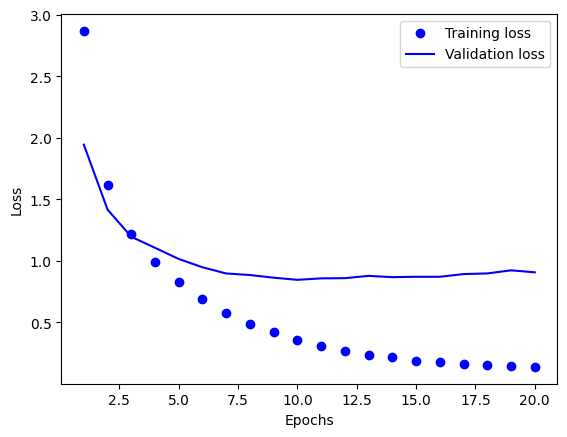

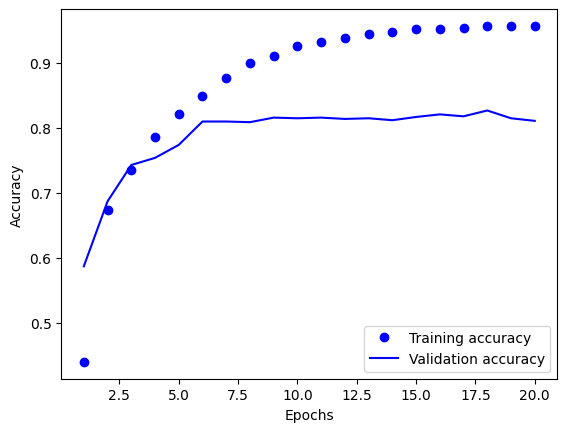

In [ ]:
plot_history(history)

## Retrain model
* Run for 9 epochs (accuracy stops improving)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4166 - loss: 3.2081 - val_accuracy: 0.6210 - val_loss: 1.8519
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6773 - loss: 1.6255 - val_accuracy: 0.6830 - val_loss: 1.3739
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7384 - loss: 1.2225 - val_accuracy: 0.7390 - val_loss: 1.1951
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7814 - loss: 1.0095 - val_accuracy: 0.7630 - val_loss: 1.0965
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8211 - loss: 0.8361 - val_accuracy: 0.7750 - val_loss: 1.0178
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8497 - loss: 0.6878 - val_accuracy: 0.8060 - val_loss: 0.9425
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8825 - loss: 0.5530 - val_accuracy: 0.8100 - val_loss: 0.9237
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9033 - loss: 0.4846 - val_accuracy: 0.8190 - val_loss

In [ ]:
results

[0.9329736232757568, 0.7885128855705261]

Is 78% accuracy high? (there are 46 classes)

In [ ]:
# accuracy of a random classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)/len(test_labels))

0.19145146927871773

## Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions[0]

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(2246, 46)


array([1.6791451e-05, 6.6007342e-04, 3.2182925e-05, 8.7855995e-01,
       1.1026338e-01, 4.0033797e-06, 1.1073357e-04, 5.5579534e-05,
       1.9000508e-03, 2.0005218e-05, 6.0458657e-05, 5.4801727e-04,
       6.3062209e-05, 1.2202645e-04, 1.9846168e-05, 3.6007641e-05,
       4.7243212e-04, 7.7079821e-05, 3.3032641e-04, 5.8467052e-04,
       1.7035169e-03, 3.2800500e-04, 2.9194323e-05, 1.5875504e-04,
       2.1972366e-04, 2.6553115e-04, 9.8180230e-05, 5.6146269e-05,
       1.4494849e-05, 2.9333375e-04, 2.3247537e-04, 7.2355015e-04,
       6.8220259e-05, 3.1311095e-06, 1.6531165e-04, 5.0787994e-06,
       8.2193152e-04, 3.1444546e-05, 1.0369508e-05, 3.0075372e-04,
       6.9498446e-06, 4.5192696e-04, 4.5216943e-06, 1.0184880e-05,
       3.7795649e-05, 2.2898983e-05], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3

# Experiment: small intermediate layers (information bottleneck)
Similar experiment, this time the second hidden layer has 4 units

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.1574 - loss: 3.7337 - val_accuracy: 0.3610 - val_loss: 3.3040
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3760 - loss: 3.1915 - val_accuracy: 0.4210 - val_loss: 2.9163
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4326 - loss: 2.7807 - val_accuracy: 0.4320 - val_loss: 2.5206
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4410 - loss: 2.4016 - val_accuracy: 0.4440 - val_loss: 2.2144
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4490 - loss: 2.1024 - val_accuracy: 0.4500 - val_loss: 1.9932
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4603 - loss: 1.8622 - val_accuracy: 0.4630 - val_loss: 1.8310
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4884 - loss: 1.6717 - val_accuracy: 0.4750 - val_loss: 1.7092
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5304 - loss: 1.5742 - val_accuracy: 0.6520 - v

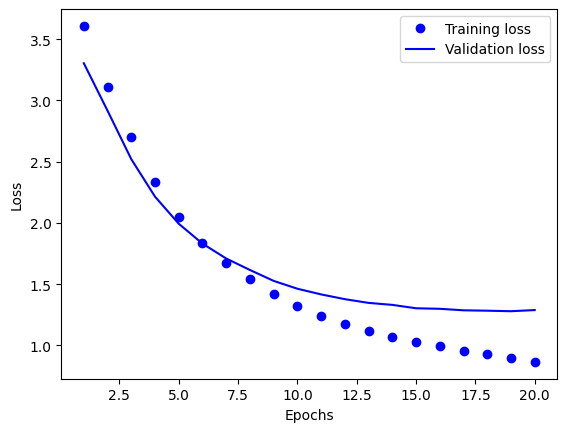

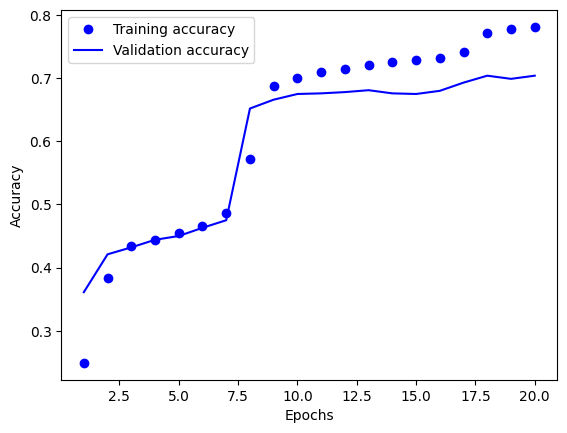

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # different
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))
plot_history(history)

# Further experiments

* Use larger and smaller layers (32 and 128 units)
* Increase/decrease the number of hidden layers

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.3654 - loss: 3.2560 - val_accuracy: 0.6190 - val_loss: 1.9476
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6636 - loss: 1.7309 - val_accuracy: 0.6790 - val_loss: 1.4434
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7193 - loss: 1.2789 - val_accuracy: 0.7290 - val_loss: 1.2387
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7735 - loss: 1.0199 - val_accuracy: 0.7520 - val_loss: 1.1186
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8253 - loss: 0.8183 - val_accuracy: 0.7780 - val_loss: 1.0390
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8591 - loss: 0.6717 - val_accuracy: 0.7920 - val_loss: 1.0090
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8858 - loss: 0.5546 - val_accuracy: 0.8030 - val_loss: 0.9579
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9094 - loss: 0.4532 - val_accuracy: 0.7990 - v

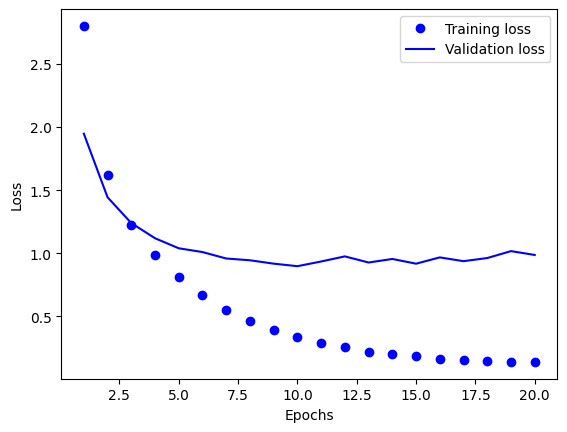

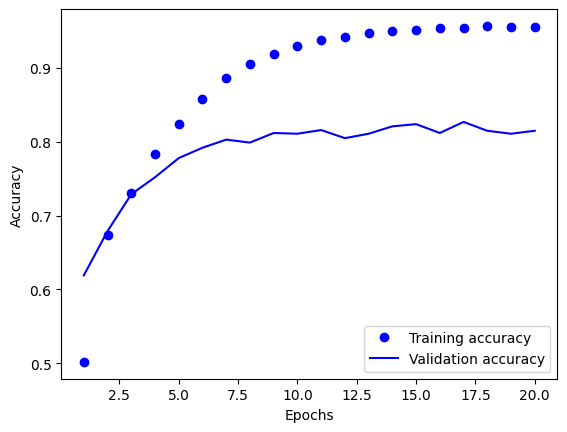

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))
plot_history(history)

# Key points
* If you are trying to classify data points among _K_ classes, your network should end with a _Dense_ layer of size _K_.
* In a single-label, multiclass classification problem, your network should end with a _softmax_ activation so that it will output a probability distribution over the _K_ outputs.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the proability distributions output by the network and the true distribution of the targets.
* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.
